In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
model = keras.Sequential()

In [6]:
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [11]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [13]:
train_scaled = train_input / 255.0
#train_scaled = train_scaled.reshape(-1, 28*28)  -> faltten 사용으로 자동으로 1차원으로 계산되므로 필요X

In [14]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state =42)

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.8902
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2818 - accuracy: 0.8947
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2710 - accuracy: 0.8991
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2595 - accuracy: 0.9036
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2489 - accuracy: 0.9068


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 767us/step - loss: 0.3231 - accuracy: 0.8856


[0.32306066155433655, 0.8855833411216736]

In [18]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [19]:
model = model_fn()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


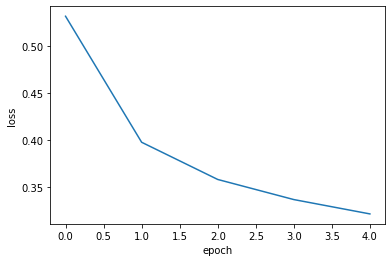

In [23]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi = 300)
plt.show()

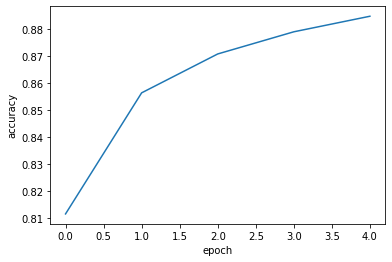

In [24]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi = 300)
plt.show()

In [25]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

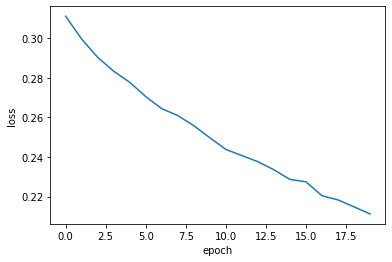

In [26]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi = 300)
plt.show()

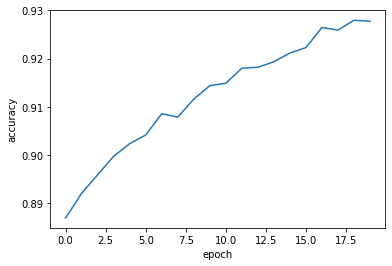

In [27]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi = 300)
plt.show()

In [36]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


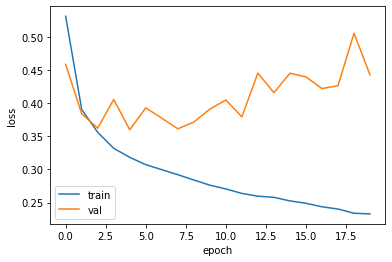

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi = 300)
plt.show()

In [41]:
#model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

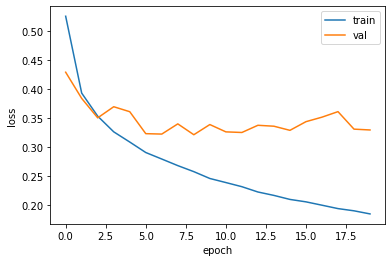

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi = 300)
plt.show()

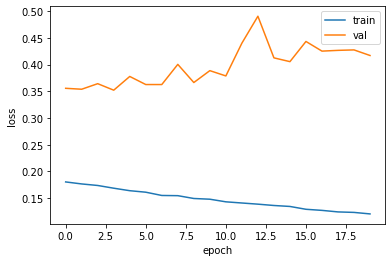

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi = 300)
plt.show()

In [43]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

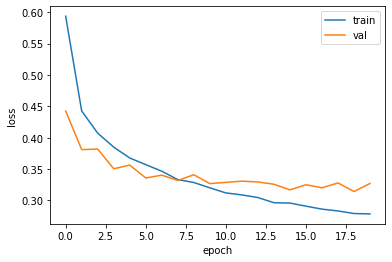

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi = 300)
plt.show()

In [46]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target))

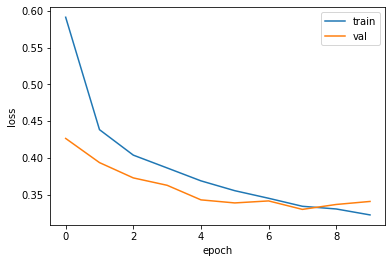

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi = 300)
plt.show()

In [48]:
model.save_weights('model_weigths.h5')

In [49]:
model.save('model-whole.h5')

In [50]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Jul 28 02:04 model_weigths.h5
-rw-r--r-- 1 root root 981736 Jul 28 02:04 model-whole.h5


In [52]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model_weigths.h5')

In [53]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [54]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 758us/step - loss: 0.3406 - accuracy: 0.8753


[0.34057629108428955, 0.875333309173584]

In [55]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 838us/step - loss: 0.3406 - accuracy: 0.8753


[0.34057629108428955, 0.875333309173584]

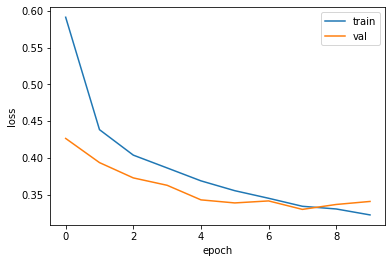

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi = 300)
plt.show()

In [57]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)

model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])

In [61]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 795us/step - loss: 0.3171 - accuracy: 0.8873


[0.3171216547489166, 0.887333333492279]

In [70]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

In [71]:
print(early_stopping_cb.stopped_epoch)

11


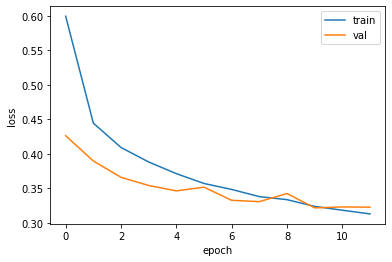

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi = 300)
plt.show()

In [67]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 883us/step - loss: 0.3319 - accuracy: 0.8782


[0.3319150507450104, 0.878166675567627]

In [69]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 796us/step - loss: 0.3319 - accuracy: 0.8782


[0.3319150507450104, 0.878166675567627]